# Используемые пакеты и начало работы


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv('data/possum.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#Предобработка данных

In [3]:
#заполнение пропусков
df['footlgth'] = df['footlgth'].fillna(0)
df['age'] = df['age'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
print(df['Pop'].value_counts())
print(df['sex'].value_counts())

other    58
Vic      46
Name: Pop, dtype: int64
m    61
f    43
Name: sex, dtype: int64


In [5]:
#One hot encoding
print(pd.get_dummies(df['Pop']))
print(pd.get_dummies(df['Pop']).iloc[:,:1]) 
df['Pop'] = pd.get_dummies(df['Pop']).iloc[:,:1]  # Vic=1, other = 0
df['sex'] = pd.get_dummies(df['sex']).iloc[:,1:]  # male=1, female = 0

     Vic  other
0      1      0
1      1      0
2      1      0
3      1      0
4      1      0
..   ...    ...
99     0      1
100    0      1
101    0      1
102    0      1
103    0      1

[104 rows x 2 columns]
     Vic
0      1
1      1
2      1
3      1
4      1
..   ...
99     0
100    0
101    0
102    0
103    0

[104 rows x 1 columns]


# Анализ наборов данных

<Axes: >

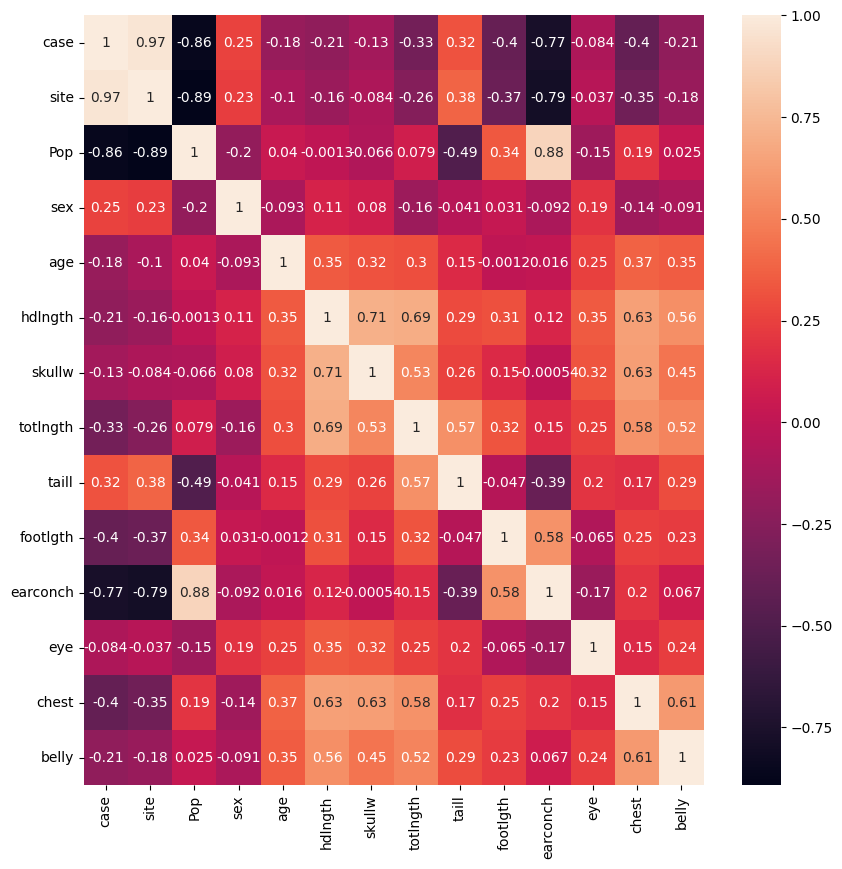

In [6]:
#проверка корреляции Пирсона
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<Axes: title={'center': 'eye'}, xlabel='Pop'>

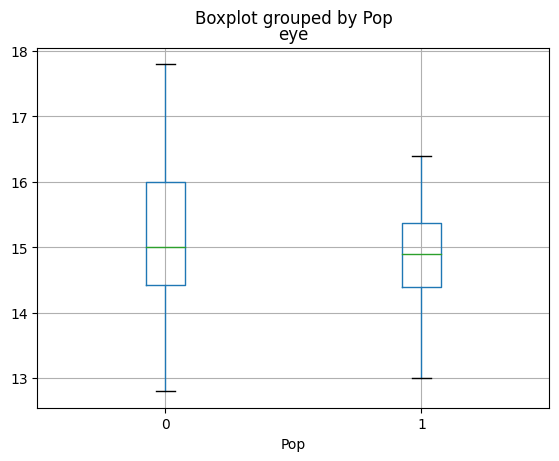

In [9]:
#ящик с усами
df.boxplot(column=['eye'], by='Pop')

<Axes: title={'center': 'eye'}, xlabel='sex'>

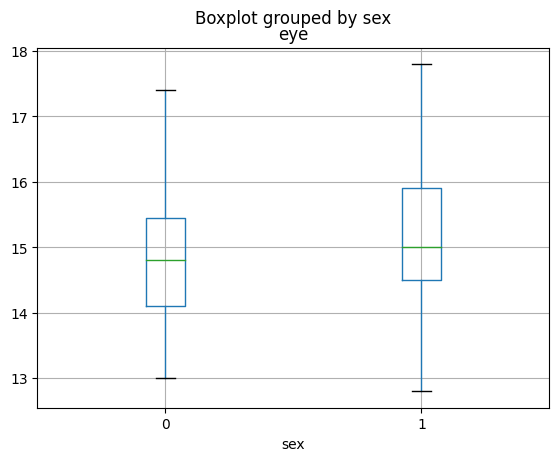

In [8]:
df.boxplot(column=['eye'], by='sex')

In [10]:
#первичные статистики
df.describe()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,0.442308,0.586538,3.759615,92.602885,56.883654,87.088462,37.009615,67.800962,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,0.499066,0.494839,1.963231,3.573349,3.113426,4.310549,1.959518,8.012193,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,0.000000,0.000000,0.000000,82.500000,50.000000,75.000000,32.000000,0.000000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,0.000000,0.000000,2.000000,90.675000,54.975000,84.000000,35.875000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,0.000000,1.000000,3.000000,92.800000,56.350000,88.000000,37.000000,67.950000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,1.000000,1.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


#Обучение моделей

In [11]:
#подготовка данных для обучения
X=df.drop(columns='hdlngth')
y=df['hdlngth']
print(X)

     case  site  Pop  sex  age  skullw  totlngth  taill  footlgth  earconch  \
0       1     1    1    1  8.0    60.4      89.0   36.0      74.5      54.5   
1       2     1    1    0  6.0    57.6      91.5   36.5      72.5      51.2   
2       3     1    1    0  6.0    60.0      95.5   39.0      75.4      51.9   
3       4     1    1    0  6.0    57.1      92.0   38.0      76.1      52.2   
4       5     1    1    0  2.0    56.3      85.5   36.0      71.0      53.2   
..    ...   ...  ...  ...  ...     ...       ...    ...       ...       ...   
99    100     7    0    1  1.0    56.0      81.5   36.5      66.0      46.8   
100   101     7    0    1  1.0    54.7      82.5   39.0      64.4      48.0   
101   102     7    0    0  6.0    55.0      89.0   38.0      63.5      45.4   
102   103     7    0    1  4.0    55.2      82.5   36.5      62.9      45.9   
103   104     7    0    0  3.0    59.9      89.0   40.0      67.6      46.0   

      eye  chest  belly  
0    15.2   28.0   36.0  

In [12]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size =0.25, random_state=41)
print('Длина обучающей выборки: {}'.format(len(X_train)))
print('Длина тестовой выборки: {}'.format(len(X_test)))

Длина обучающей выборки: 78
Длина тестовой выборки: 26


In [13]:
#обучение модели
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Root Mean Squared Error: {}'.format(round(metrics.mean_squared_error(y_pred, y_test),4)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_pred, y_test),4)))
print('R2 Error: {}'.format(round(metrics.r2_score(y_pred, y_test),4)))

Root Mean Squared Error: 19.2505
Mean Absolute Error: 2.5472
R2 Error: 0.3862


In [14]:
#ручная проверка результатов
print(X_test[0:1])
print(y_test[0:1])

print(model.predict(X_test[0:1]))

    case  site  Pop  sex  age  skullw  totlngth  taill  footlgth  earconch  \
92    93     7    0    1  3.0    54.0      82.0   38.0      63.8      44.9   

     eye  chest  belly  
92  12.8   24.0   31.0  
92    89.2
Name: hdlngth, dtype: float64
[88.00599908]


In [22]:
#визуализация при помощи Matplotlib
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size =0.25, random_state=41)

model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)

array([ 88.00599908,  92.01678123,  94.05189004,  91.88516607,
        96.82260862,  69.79192146,  93.24939114,  90.06473304,
        91.40027744,  95.37199286, 100.15106504,  90.63137448,
        94.14737759,  97.86091001,  95.21243652,  96.63328356,
        91.08614885,  88.11819283,  89.18436866,  98.81428097,
        90.57688817,  96.53405759,  91.35596853,  94.83761678,
        91.53172925,  87.31110483])

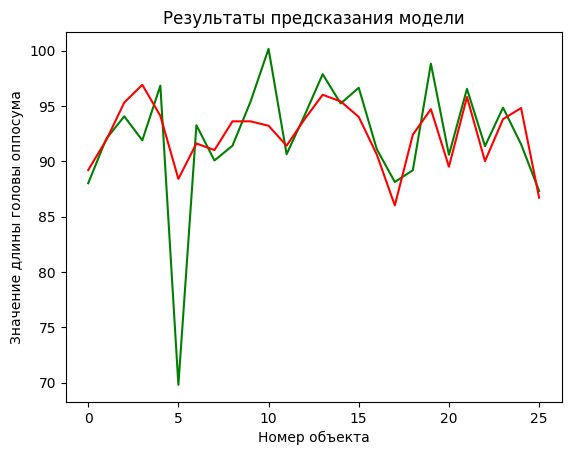

In [16]:
plt.plot(model.predict(X_test), color = "green")
plt.plot(y_test.values, color = "red")
plt.title("Результаты предсказания модели")
plt.xlabel("Номер объекта")
plt.ylabel("Значение длины головы оппосума")
plt.show()

# Валидация и анализ результатов

In [17]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, X, y,scoring='neg_mean_absolute_error', cv=4)
-scores

array([2.64054175, 2.47835435, 1.83434148, 2.08722535])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = SVC()

scores1 = cross_val_score(model1, X, y,scoring='neg_mean_absolute_error', cv=4)
scores2 = cross_val_score(model2, X, y,scoring='neg_mean_absolute_error', cv=4)
scores3 = cross_val_score(model1, X, y,scoring='neg_mean_absolute_error', cv=4)

print('Среднее значение MAE по моделям.')
print('Линейная регрессия {}'.format(-sum(scores1)/4))
print('Дерево решений {}'.format(-sum(scores2)/4))
print('Метод опорных векторов {}'.format(-sum(scores3)/4))

Среднее значение MAE по моделям.
Линейная регрессия 2.2601157350426013
Дерево решений 2.718269230769231
Метод опорных векторов 2.2601157350426013


In [19]:
scores1 = cross_val_score(model1, X, y,scoring='r2', cv=4)
scores2 = cross_val_score(model2, X, y,scoring='r2', cv=4)
scores3 = cross_val_score(model1, X, y,scoring='r2', cv=4)

print('Среднее значение R2 по моделям.')
print('Линейная регрессия {}'.format(-sum(scores1)/4))
print('Дерево решений {}'.format(-sum(scores2)/4))
print('Метод опорных векторов {}'.format(-sum(scores3)/4))

Среднее значение R2 по моделям.
Линейная регрессия 0.729470071857003
Дерево решений 0.7470341523179436
Метод опорных векторов 0.729470071857003


In [20]:
scores1 = cross_val_score(model1, X, y,scoring='neg_root_mean_squared_error', cv=4)
scores2 = cross_val_score(model2, X, y,scoring='neg_root_mean_squared_error', cv=4)
scores3 = cross_val_score(model1, X, y,scoring='neg_root_mean_squared_error', cv=4)

print('Среднее значение RMSE по моделям.')
print('Линейная регрессия {}'.format(-sum(scores1)/4))
print('Дерево решений {}'.format(-sum(scores2)/4))
print('Метод опорных векторов {}'.format(-sum(scores3)/4))

Среднее значение RMSE по моделям.
Линейная регрессия 3.0170035149352956
Дерево решений 3.33929810365356
Метод опорных векторов 3.0170035149352956


In [21]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

scores1 = cross_val_score(svr_rbf, X, y,scoring='neg_root_mean_squared_error', cv=4)
scores2 = cross_val_score(svr_lin, X, y,scoring='neg_root_mean_squared_error', cv=4)

print('Среднее значение RMSE по моделям.')
print('Ядро  радиальное {}'.format(-sum(scores1)/4))
print('Ядро линейное {}'.format(-sum(scores2)/4))

Среднее значение RMSE по моделям.
Ядро  радиальное 3.511044337056597
Ядро линейное 3.004583183482158


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    scoring='neg_mean_absolute_error',
    param_grid={"C": [1, 10, 100, 200], "gamma": np.logspace(-2, 2, 5), 'epsilon':[0.1,0.01,1]},
)

svr.fit(X, y)
print(f"Лучшие параметры: {svr.best_params_} и MAE: {-svr.best_score_:.3f}")

Лучшие параметры: {'C': 10, 'epsilon': 0.01, 'gamma': 0.01} и MAE: 2.280


# Отбор признаков

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

scores1 = cross_val_score(model1, X, y,scoring='neg_mean_absolute_error', cv=4)
scores2 = cross_val_score(model1, X, y,scoring='r2', cv=4)
scores3 = cross_val_score(model1, X, y,scoring='neg_root_mean_squared_error', cv=4)

print('MAE {}'.format(-sum(scores1)/4))
print('R2 {}'.format(-sum(scores2)/4))
print('RMSE {}'.format(-sum(scores3)/4))

MAE 2.260115735042607
R2 0.7294700718570019
RMSE 3.017003514935292


In [ ]:
svr.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_epsilon', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=10)
fited = fs.fit(X, y)
print(fited.get_support())
print(X.loc[:, fited.get_support()])

[ True  True False False  True  True  True  True  True False  True  True
  True]
     case  site  age  skullw  totlngth  taill  footlgth   eye  chest  belly
0       1     1  8.0    60.4      89.0   36.0      74.5  15.2   28.0   36.0
1       2     1  6.0    57.6      91.5   36.5      72.5  16.0   28.5   33.0
2       3     1  6.0    60.0      95.5   39.0      75.4  15.5   30.0   34.0
3       4     1  6.0    57.1      92.0   38.0      76.1  15.2   28.0   34.0
4       5     1  2.0    56.3      85.5   36.0      71.0  15.1   28.5   33.0
..    ...   ...  ...     ...       ...    ...       ...   ...    ...    ...
99    100     7  1.0    56.0      81.5   36.5      66.0  14.8   23.0   27.0
100   101     7  1.0    54.7      82.5   39.0      64.4  14.0   25.0   33.0
101   102     7  6.0    55.0      89.0   38.0      63.5  13.0   25.0   30.0
102   103     7  4.0    55.2      82.5   36.5      62.9  15.4   25.0   29.0
103   104     7  3.0    59.9      89.0   40.0      67.6  14.8   28.5   33.5

[104 r

In [ ]:
X_new = X.loc[:, fited.get_support()]


from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

scores1 = cross_val_score(model1, X_new, y,scoring='neg_mean_absolute_error', cv=4)
scores2 = cross_val_score(model1, X_new, y,scoring='r2', cv=4)
scores3 = cross_val_score(model1, X_new, y,scoring='neg_root_mean_squared_error', cv=4)

print('MAE {}'.format(-sum(scores1)/4))
print('R2 {}'.format(-sum(scores2)/4))
print('RMSE {}'.format(-sum(scores3)/4))

MAE 1.9565992921929491
R2 0.23341801316972263
RMSE 2.588619038587109
